In [82]:
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import folium
from folium import plugins

import warnings
warnings.filterwarnings("ignore")

In [60]:
DATA_SOURCE = os.path.join(os.getcwd(), "data")
df = pd.read_excel(os.path.join(DATA_SOURCE, "Covid cases in India.xlsx"))
df_India = df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,2,0,0,0
1,2,Chhattisgarh,1,0,0,0
2,3,Delhi,16,1,3,1
3,4,Gujarat,2,0,0,0
4,5,Haryana,3,14,0,0
5,6,Karnataka,15,0,0,1
6,7,Kerala,26,2,3,0
7,8,Maharashtra,44,3,0,1
8,9,Odisha,2,0,0,0
9,10,Puducherry,1,0,0,0


In [61]:
df.drop(['S. No.'], axis=1, inplace=True)
df['Total Cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']

In [62]:
df.style.background_gradient(cmap='Blues')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,2,0,0,0,2
1,Chhattisgarh,1,0,0,0,1
2,Delhi,16,1,3,1,17
3,Gujarat,2,0,0,0,2
4,Haryana,3,14,0,0,17
5,Karnataka,15,0,0,1,15
6,Kerala,26,2,3,0,28
7,Maharashtra,44,3,0,1,47
8,Odisha,2,0,0,0,2
9,Puducherry,1,0,0,0,1


In [67]:
df['Active Cases'] = df['Total Cases'] - (df['Cured'] + df['Death'])
active_cases = df[['Name of State / UT', 'Active Cases']].sort_values(by=['Active Cases'], ascending=False)
active_cases.style.hide_index()

Name of State / UT,Active Cases
Maharashtra,46
Kerala,25
Haryana,17
Telengana,15
Karnataka,14
Delhi,13
Uttar Pradesh,10
Union Territory of Ladakh,10
Union Territory of Jammu and Kashmir,4
Rajasthan,4


In [78]:
Coords_of_India = pd.read_excel(os.path.join(DATA_SOURCE, "Indian Coordinates.xlsx"))

df_full = pd.merge(Coords_of_India, df, on="Name of State / UT")
df_map = folium.Map(location=[20, 70], zoom_start=4, tiles='Stamenterrain')

for lat, lon, total_cases, name_of_state_or_ut in zip(df_full['Latitude'], df_full['Longitude'], df_full['Active Cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=total_cases*0.8, popup = ('<strong>State</strong>: ' + str(name_of_state_or_ut).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(total_cases) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(df_map)

df_map

C:\Users\BeharaGowtham\.conda\envs\Covid19Edureka\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



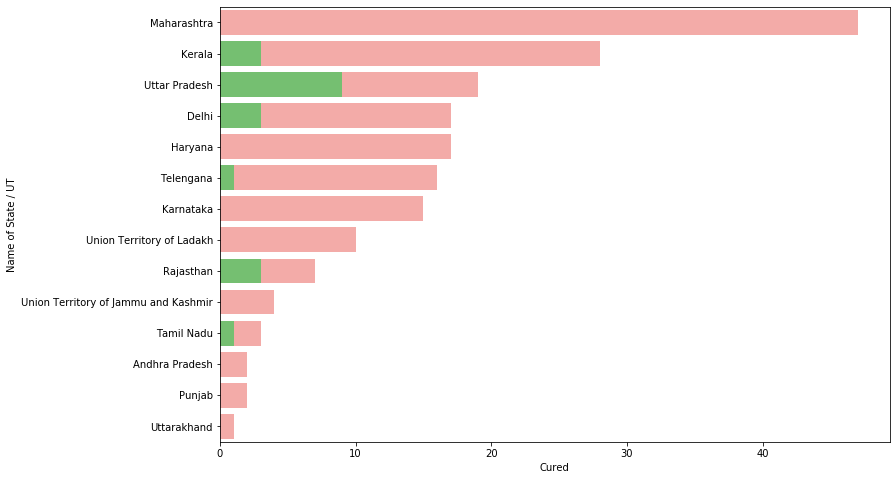

In [83]:
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT', 'Total Cases', 'Cured', 'Death']]
data.sort_values('Total Cases', ascending=False, inplace=True)

sb.set_color_codes("pastel")
sb.barplot(x="Total Cases", y="Name of State / UT", data=data, label="Total Cases", color="r")

sb.set_color_codes("muted")
sb.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured Cases", color="g")